![NYC Skyline](img/nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many [Airbnb](https://www.airbnb.com/) listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this notebook, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

Our goals are to convert untidy data into appropriate formats to analyze, and answer key questions including:

- What is the average price, per night, of an Airbnb listing in NYC?
- How does the average price of an Airbnb listing, per month, compare to the private rental market?
- How many adverts are for private rooms?
- How do Airbnb listing prices compare across the five NYC boroughs?


In [47]:
# We've loaded your first package for you! You can add as many cells as you need.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
prices = pd.read_csv('data/airbnb_price.csv')
prices.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


# Import Data

In [49]:
room_type = pd.read_excel('data/airbnb_room_type.xlsx')
room_type.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [50]:
reviews = pd.read_csv('data/airbnb_last_review.tsv', delimiter='\t', header=0)
reviews.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


## Data Exploration and Cleaning

In [51]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [52]:
prices['price'] = prices['price'].str.replace(' dollars', '').astype(int)

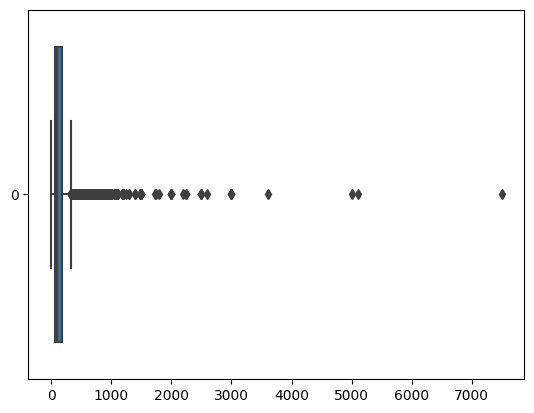

In [53]:
sns.boxplot(prices['price'], orient='h')
plt.show()

In [54]:
prices['price'].describe()

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64

Majority of prices fall between 69-175 per night. The average price is 141.77 per night, the media is 105.00. The most expensive booking costs 7500 per night. There were also some booking with a price of 0. I am going to remove these as I am not sure if it was a mistake.

In [55]:
free_listings = prices['price'] == 0
prices = prices.loc[~free_listings]

In [56]:
# find average price
avg_price = prices['price'].mean().round(2)
avg_price

141.82

After removing the $0 listings the mean price is 141.82

In [57]:
prices['price_per_month'] = (prices['price'] * 365) / 12
prices['price_per_month']

0        6843.750000
1        2707.083333
2        6083.333333
3        2402.916667
4        4562.500000
            ...     
25204    3923.750000
25205    1368.750000
25206    7147.916667
25207    3041.666667
25208     912.500000
Name: price_per_month, Length: 25202, dtype: float64

In [58]:
avg_price_per_month = prices['price_per_month'].mean().round(2)
avg_price_per_month

4313.61

In [59]:
difference = round((avg_price_per_month - 3100),2)

The average price per month for an airbnb in NYC is 4313.51

## **How does the average price of an Airbnb listing, per month, compare to the private rental market?**

In [60]:
merged_df = prices.merge(room_type, on='listing_id')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25202 entries, 0 to 25201
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   listing_id       25202 non-null  int64  
 1   price            25202 non-null  int64  
 2   nbhood_full      25202 non-null  object 
 3   price_per_month  25202 non-null  float64
 4   description      25192 non-null  object 
 5   room_type        25202 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.3+ MB


In [61]:
merged_df['room_type'].value_counts()

Entire home/apt    8458
Private room       7240
entire home/apt    2665
private room       2247
ENTIRE HOME/APT    2143
PRIVATE ROOM       1864
Shared room         378
shared room         110
SHARED ROOM          97
Name: room_type, dtype: int64

Many different used of upper and lowercase letters in room_type column values. Will make all values lowercase to consolidate data.

In [62]:
merged_df['room_type'] = merged_df['room_type'].str.lower()

In [63]:
merged_df['room_type'].value_counts()

entire home/apt    13266
private room       11351
shared room          585
Name: room_type, dtype: int64

In [64]:
# Update the room_type column to category data type
merged_df["room_type"] = merged_df["room_type"].astype("category")

In [65]:
room_frequencies = merged_df['room_type'].value_counts()

## Cleaning date columns

In [66]:
# Change the data type of the last_review column to datetime
reviews["last_review"] = pd.to_datetime(reviews["last_review"])

# Create first_reviewed, the earliest review date
first_reviewed = reviews["last_review"].dt.date.min()

# Create last_reviewed, the most recent review date
last_reviewed = reviews["last_review"].dt.date.max()

## Final merging

In [67]:
merged_df = merged_df.merge(reviews, how='outer', on='listing_id')
# Drop missing values from airbnb_merged
merged_df.dropna(inplace=True)

## Listing Prices by borough

In [68]:
# Extract information from the nbhood_full column and store as a new column, borough
merged_df["borough"] = merged_df["nbhood_full"].str.partition(",")[0]

# Group by borough and calculate summary statistics
boroughs = merged_df.groupby("borough")["price"].agg(["sum", "mean", "median", "count"])

# Round boroughs to 2 decimal places, and sort by mean in descending order
boroughs = boroughs.round(2).sort_values("mean", ascending=False)

boroughs

,sum,mean,median,count
borough,,,,
Manhattan,1898417.0,184.04,149.0,10315
Brooklyn,1275250.0,122.02,95.0,10451
Queens,320715.0,92.83,70.0,3455
Staten Island,22974.0,86.04,71.0,267
Bronx,55156.0,79.25,65.0,696


## Price Ranges by borough

In [69]:
# Create labels for the price range, label_names
label_names = ["Budget", "Average", "Expensive", "Extravagant"]

# Create the label ranges, ranges
ranges = [0, 69, 175, 350, np.inf]

# Insert new column, price_range, into DataFrame
merged_df["price_range"] = pd.cut(merged_df["price"], bins=ranges, labels=label_names)

# Calculate occurence frequencies for each label, prices_by_borough
prices_by_borough = merged_df.groupby(["borough", "price_range"])["price_range"].count()
prices_by_borough

borough        price_range
Bronx          Budget          381
               Average         285
               Expensive        25
               Extravagant       5
Brooklyn       Budget         3194
               Average        5532
               Expensive      1466
               Extravagant     259
Manhattan      Budget         1148
               Average        5285
               Expensive      3072
               Extravagant     810
Queens         Budget         1631
               Average        1505
               Expensive       291
               Extravagant      28
Staten Island  Budget          124
               Average         123
               Expensive        20
               Extravagant       0
Name: price_range, dtype: int64

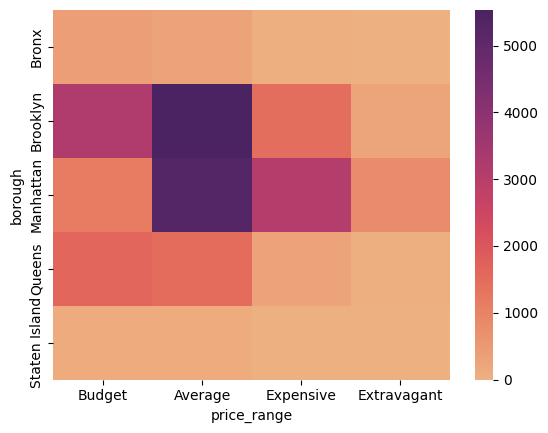

In [70]:
# Reshape the prices_by_borough Series into a DataFrame
prices_by_borough_df = prices_by_borough.unstack(level=1, fill_value=0)

# Create the heatmap using Seaborn
sns.heatmap(prices_by_borough_df, cmap='flare')

# Show the plot
plt.show()

In [71]:
solution = {'avg_price':avg_price,
            'average_price_per_month': avg_price_per_month,  
            'difference':difference,          
            'room_frequencies':room_frequencies, 
            'first_reviewed': first_reviewed,
            'last_reviewed': last_reviewed,
            'prices_by_borough':prices_by_borough}
print(solution)

{'avg_price': 141.82, 'average_price_per_month': 4313.61, 'difference': 1213.61, 'room_frequencies': entire home/apt    13266
private room       11351
shared room          585
Name: room_type, dtype: int64, 'first_reviewed': datetime.date(2019, 1, 1), 'last_reviewed': datetime.date(2019, 7, 9), 'prices_by_borough': borough        price_range
Bronx          Budget          381
               Average         285
               Expensive        25
               Extravagant       5
Brooklyn       Budget         3194
               Average        5532
               Expensive      1466
               Extravagant     259
Manhattan      Budget         1148
               Average        5285
               Expensive      3072
               Extravagant     810
Queens         Budget         1631
               Average        1505
               Expensive       291
               Extravagant      28
Staten Island  Budget          124
               Average         123
               Expensive  